# Housing Prices

In [1]:
import helpers as hp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import boxcox
from scipy.stats import normaltest
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sqlalchemy import create_engine

from config import usr, pwd, url, port, db

%matplotlib inline

## Load Data
Load dataset used to create previously developed housing prices model.

In [2]:
df_model = pd.read_csv('housing_price_model.csv')

In [3]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 7 columns):
Unnamed: 0             1379 non-null int64
garagearea_bc_tk_sd    1379 non-null float64
totalbsmtsf_tk_sd      1379 non-null float64
garagecars_tk_sd       1379 non-null float64
grlivarea_bc_tk_sd     1379 non-null float64
overallqual_sd         1379 non-null float64
saleprice_bc_tk_sd     1379 non-null float64
dtypes: float64(6), int64(1)
memory usage: 75.5 KB


## Modeling

In [4]:
features = ['garagearea_bc_tk_sd', 'totalbsmtsf_tk_sd', 'garagecars_tk_sd', 'grlivarea_bc_tk_sd', 'overallqual_sd']
X = df_model.loc[:, features]
y = df_model['saleprice_bc_tk_sd']

lrm = linear_model.LinearRegression()

lrm.fit(X, y)

print(f'Coefficients: {lrm.coef_}')
print(f'Intercept: {lrm.intercept_}')

# Make predictions
y_pred = lrm.predict(X)

# Compute errors between actual values and predictions
errors = y - y_pred

Coefficients: [0.07647727 0.20583181 0.09628892 0.31119974 0.41619647]
Intercept: 2.33869352338705e-14


## Model Evaluation
### Linearity of model coefficients

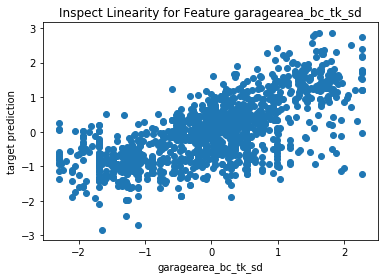

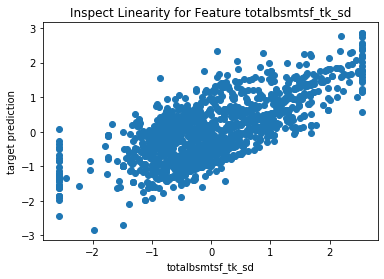

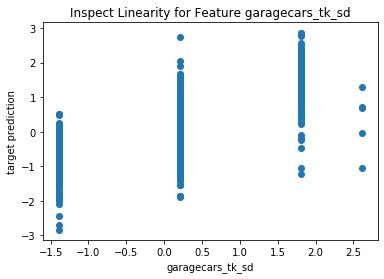

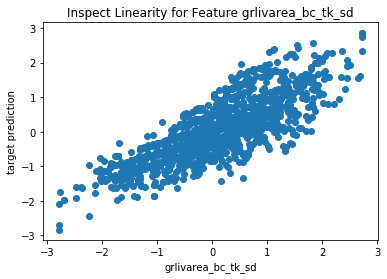

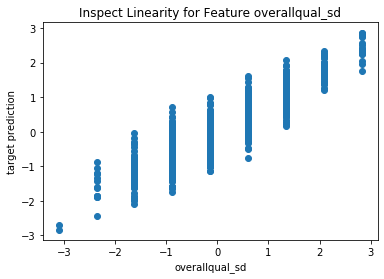

In [5]:
hp.check_feature_linearity(df_model, features, y_pred)

**Observations:** This is a linear relationship between all features and the target prediction. In addition, `'garagecars_tk_sd'` and `'overallqual_sd'` show specific, integer values. Maybe these should have been categorical variables.

### Average errors

In [6]:
print(f'The average error is {errors.mean()}.')

The average error is -1.2881485419871288e-17.


**Observations:** The average error is zero.

### Homoscedasticity

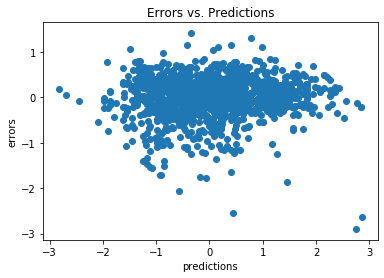

The Bartlett test is 642.7933776292189, with a p-value of 8.249409870785884e-142.
The Levine test is 582.6756392397915, with a p-value of 6.0195266887412014e-117.


In [7]:
hp.check_homoscedasticity(y_pred, errors)

**Observations:** Both the Bartlett test and the Levine test indicate that there is a large amount of heteroscedacity in the model. This could be due to too few variables in the model or outliers not being sufficiently corrected.

### Multicolinearity

In [8]:
df_model.loc[:, features].corr()

,garagearea_bc_tk_sd,totalbsmtsf_tk_sd,garagecars_tk_sd,grlivarea_bc_tk_sd,overallqual_sd
garagearea_bc_tk_sd,1.000000,0.476442,0.855861,0.463766,0.525924
totalbsmtsf_tk_sd,0.476442,1.000000,0.461542,0.400205,0.535530
garagecars_tk_sd,0.855861,0.461542,1.000000,0.502672,0.588141
grlivarea_bc_tk_sd,0.463766,0.400205,0.502672,1.000000,0.602336
overallqual_sd,0.525924,0.535530,0.588141,0.602336,1.000000


**Observations:** There are high correlations between some of the features. This could explain why the model isn't performing the best.

### Error correlations

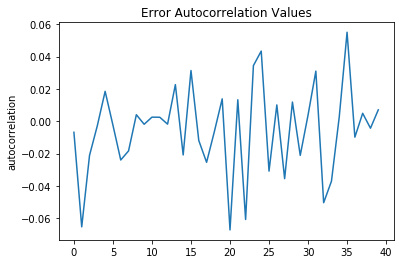

Max autocorrelation: 0.055
Min autocorrelation: -0.067


In [9]:
hp.check_error_autocorrelation(errors)

**Observations:** The autocorrelation between the errors is very small. This is good!

### Error and feature correlations

In [10]:
df_model['errors'] = errors

In [11]:
df_model.corr()['errors']

Unnamed: 0            -9.418529e-03
garagearea_bc_tk_sd   -1.062744e-16
totalbsmtsf_tk_sd     -1.031701e-16
garagecars_tk_sd      -6.199339e-17
grlivarea_bc_tk_sd     4.119958e-17
overallqual_sd        -3.303727e-16
saleprice_bc_tk_sd     4.412202e-01
errors                 1.000000e+00
Name: errors, dtype: float64

**Observations:** The correlations are almost zero between the errors and the features. This is also good!